## Data Analysis for Electric Vehicle Population

In [3]:
#import some important libraries
# import some basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scientific and statistical computing
import scipy as sp

# To make working with geospatial data in python easier
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

plt.style.use('ggplot')

### Data Loading and Exploration

In [4]:
# Load the dataset 
df = pd.read_csv('Electric_Vehicle_Population.csv')

In [5]:
# Display the data
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,200589147,POINT (-104.89239 39.61914),NaN,8.005007e+09
1,5YJXCBE27J,Island,Greenbank,WA,98253.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10.0,326880081,POINT (-122.575569 48.08489),NaN,5.302997e+10
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,182237457,POINT (-119.78637 36.30101),NaN,6.031980e+09
3,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,320914072,POINT (-122.300531 37.869271),NaN,6.001423e+09


In [6]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
109476,KM8K33AGXN,Whatcom,Bellingham,WA,98229.0,2022,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,176212200,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
109477,5YJ3E1EB2N,King,Sammamish,WA,98075.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,185637224,POINT (-122.028168 47.586173),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
109478,5YJYGDEE9M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,153892070,POINT (-122.212105 47.792368),PUGET SOUND ENERGY INC,5.306105e+10
109479,1N4AZ1CP0J,King,Shoreline,WA,98133.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,289064191,POINT (-122.343983 47.739969),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
109480,5YJYGDEE2M,Benton,Richland,WA,99354.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,171199227,POINT (-119.26844 46.31484),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10


In [8]:
df.shape

(109481, 17)

In [10]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [11]:
df.columns.unique()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         109481 non-null  object 
 1   County                                             109480 non-null  object 
 2   City                                               109480 non-null  object 
 3   State                                              109481 non-null  object 
 4   Postal Code                                        109480 non-null  float64
 5   Model Year                                         109481 non-null  int64  
 6   Make                                               109481 non-null  object 
 7   Model                                              109474 non-null  object 
 8   Electric Vehicle Type                              109481 non-null  object

#### Observation Number 1

After an initial review of the dataset, the following insights and considerations regarding specific columns have been identified:

    VIN (1-10): Acts as a unique identifier or index for the dataset.

    Postal Code: Currently stored in a float format, this column needs to be converted to an integer for consistency and usability.

    Base MSRP: Represents the lowest Manufacturer's Suggested Retail Price (MSRP). While this is a crucial column, we need to assess its data quality to ensure it is adequately populated.

    Model Year, Make, Model: These attributes are already derived from the decoded VIN (1-10) identifier, making them redundant if the VIN is used effectively.

    Electric Utility: Describes the Electric Retail Services:
        |: Indicates a single service provider from the same vendor.
        ||: Represents multiple service providers from various vendors.
        Blank: Implies data is not available.
        Before renaming, we will examine the health of this column by checking for NULL or missing values. This information can be categorized as:
        Single Type Utility
        Multi-Type Utility
        Not Available

    Column Names with Spaces: Several column names contain spaces, which can complicate analysis. These will be renamed for clarity and ease of use:
        Postal Code
        Model Year
        Electric Vehicle Type
        Clean Alternative Fuel Vehicle (CAFV) Eligibility
        Electric Range
        Base MSRP
        Legislative District
        DOL Vehicle ID
        Vehicle Location
        Electric Utility
        2020 Census Tract

    Potential Columns for Purging: Based on the analysis requirements, the following columns may be removed in later stages of the analysis, if deemed unnecessary:
        Base MSRP
        Legislative District

### Descriptive Statistics
We use descriptive statistics to summarize and understand the key features of dataset.

In [13]:
df.describe().style.background_gradient(cmap='Blues')

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,109480.000000,109481.000000,109481.000000,109481.000000,109205.000000,109481.000000,109480.000000
mean,98157.012943,2018.899197,90.211425,1849.194609,29.824120,198447551.859601,52968493402.103012
std,2640.605503,2.872853,102.575715,10946.085012,14.679959,95617186.541589,1675103687.859588
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4777.000000,1101001400.000000
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,146731322.000000,53033008500.000000
50%,98121.000000,2019.000000,35.000000,0.000000,34.000000,187411808.000000,53033029304.000000
75%,98370.000000,2021.000000,208.000000,0.000000,43.000000,216917571.000000,53053072506.000000
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,479254772.000000,56033000100.000000


In [15]:
# Now check the missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 1
City                                                   1
State                                                  0
Postal Code                                            1
Model Year                                             0
Make                                                   0
Model                                                  7
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 276
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                     428
2020 Census Tract                                      1
dtype: int64

In [16]:
# for better visualization
df.isnull().sum().sort_values(ascending = False)

Electric Utility                                     428
Legislative District                                 276
Vehicle Location                                      25
Model                                                  7
2020 Census Tract                                      1
Postal Code                                            1
County                                                 1
City                                                   1
VIN (1-10)                                             0
Electric Vehicle Type                                  0
Make                                                   0
Model Year                                             0
State                                                  0
Base MSRP                                              0
Electric Range                                         0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
DOL Vehicle ID                                         0
dtype: int64

columns like Electric Utility and  Legislative District has the missing value 

### 2. Exploratory Data Analysis and Visualization

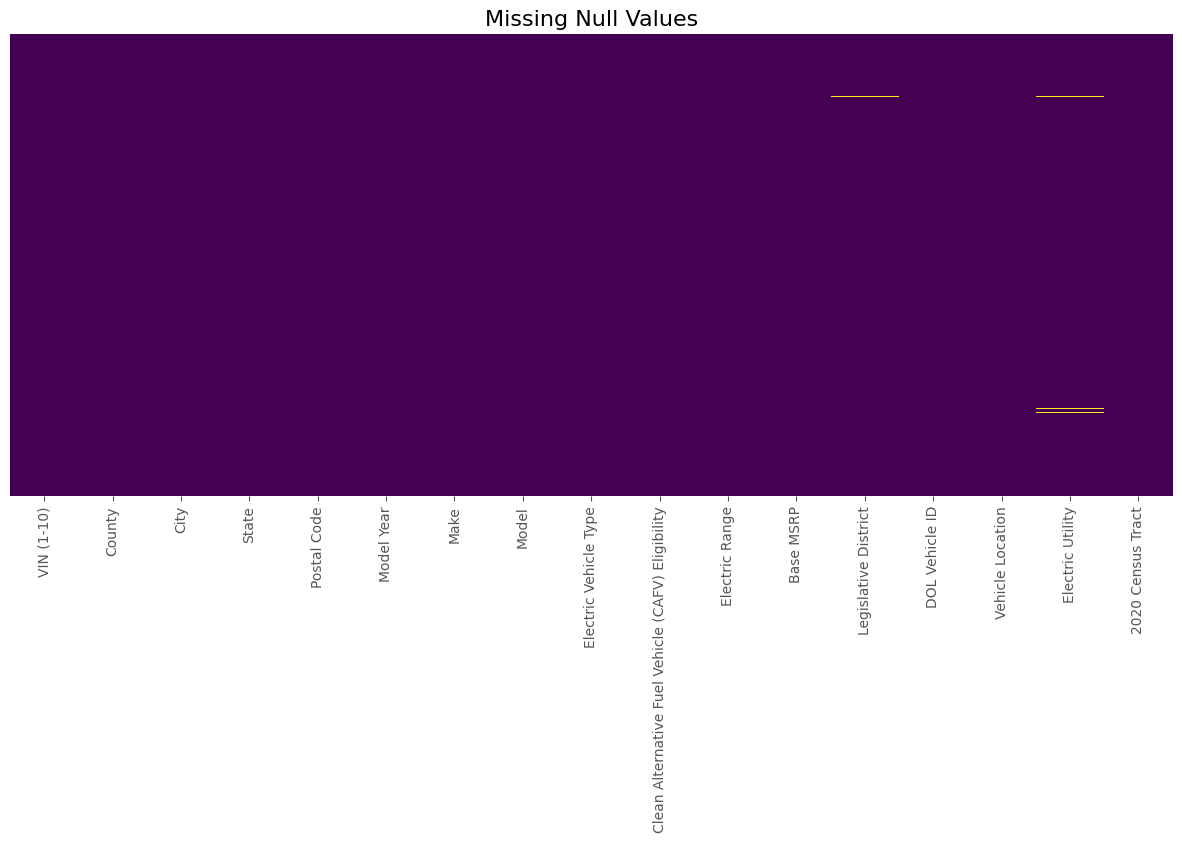

In [17]:
# Set the figure size
plt.rcParams['figure.figsize'] = (15, 6)

# Plot the heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Add a title
plt.title("Missing Null Values", fontsize=16)

# Display the plot
plt.show()

In [18]:
#calculates the percentage of missing (null) values for each column in the dataset and sorts them in descending order. 
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Electric Utility                                     0.390935
Legislative District                                 0.252099
Vehicle Location                                     0.022835
Model                                                0.006394
2020 Census Tract                                    0.000913
Postal Code                                          0.000913
County                                               0.000913
City                                                 0.000913
VIN (1-10)                                           0.000000
Electric Vehicle Type                                0.000000
Make                                                 0.000000
Model Year                                           0.000000
State                                                0.000000
Base MSRP                                            0.000000
Electric Range                                       0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
DOL Vehi

### Dealing with the null values:

* **Electric Utility:** null values will be filled with text 'Utility Not Avalilable'
* **Legislative District:** null values will be filled with text 'Unknown'
* **Vehicle Location:** null values will be filled with text 'Unknown'
* **Model:** null values will be filled with text 'Unknown'
* **2020 Census Tract:** null values will be filled with text 'Unknown'
* **City:** null values will be filled with text 'Unknown'
* **Postal Code:** null values will be filled with mean()
* **County:** null values will be filled with text 'Unknown'

In [19]:
df['Electric Utility'] = df['Electric Utility'].fillna('Utility Not Avalilable')
df['Legislative District'] = df['Legislative District'].fillna('Unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
df['2020 Census Tract'] = df['2020 Census Tract'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')

# fill null values in the 'Postal Code' column with the mean salary
mean_postcode = df['Postal Code'].mean()
df['Postal Code'] = df['Postal Code'].fillna(mean_postcode)

df['County'] = df['County'].fillna('Unknown')

In [21]:
#calculates the percentage of missing (null) values for each column in the dataset and sorts them in descending order. 
missing_percentage1 = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage1

VIN (1-10)                                           0.0
County                                               0.0
City                                                 0.0
State                                                0.0
Postal Code                                          0.0
Model Year                                           0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Range                                       0.0
Base MSRP                                            0.0
Legislative District                                 0.0
DOL Vehicle ID                                       0.0
Vehicle Location                                     0.0
Electric Utility                                     0.0
2020 Census Tract                                    0.0
dtype: float64

In [22]:
# convert the 'Postal Code ' attribute from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         109481 non-null  object
 1   County                                             109481 non-null  object
 2   City                                               109481 non-null  object
 3   State                                              109481 non-null  object
 4   Postal Code                                        109481 non-null  int64 
 5   Model Year                                         109481 non-null  int64 
 6   Make                                               109481 non-null  object
 7   Model                                              109481 non-null  object
 8   Electric Vehicle Type                              109481 non-null  object
 9   Clea

### Dealing with the column names with spaces in between them

Athough its not a critical issue, but for the ease of coding & readability., We will rename the following columns to remove any extra space in column names:

* **Postal Code:** PostalCode
* **Model Year:** ModelYear
* **Electric Vehicle Type:** Electric_Vehicle_Type
* **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** CAFV_Eligibility
* **Electric Range:** Electric_Range
* **Base MSRP:** Base_MSRP
* **Legislative District:** Legislative_District
* **DOL Vehicle ID:** DOL_Vehicle_ID
* **Vehicle Location:** Vehicle_Location
* **Electric Utility:** Electric_Utility
* **2020 Census Tract:** 2020_Census_Tract
* **VIN (1-10):** VIN

In [24]:
# rename columns 
df = df.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Electric_Vehicle_Type', 
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                        'Electric Range':'Electric_Range', 'Base MSRP': 'Base_MSRP', 'Legislative District':'Legislative_District',
                        'DOL Vehicle ID': 'DOL_Vehicle_ID',
                        'Vehicle Location':'Vehicle_Location',
                        'Electric Utility':'Electric_Utility',
                        '2020 Census Tract':'2020_Census_Tract',
                        'VIN (1-10)':'VIN'})
print(df.columns)

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')


In [25]:
# have a view of refreshed dataset again
df.isnull().sum().sort_values(ascending = False)

VIN                      0
County                   0
City                     0
State                    0
PostalCode               0
ModelYear                0
Make                     0
Model                    0
Electric_Vehicle_Type    0
CAFV_Eligibility         0
Electric_Range           0
Base_MSRP                0
Legislative_District     0
DOL_Vehicle_ID           0
Vehicle_Location         0
Electric_Utility         0
2020_Census_Tract        0
dtype: int64

In [26]:
# Find duplications and Analyse them if its a valid Duplication.
df.duplicated().any()

np.False_

In [27]:
df.columns.unique()

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [28]:
any_duplicates = df.duplicated(subset=['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract']).any()

In [29]:
any_duplicates

np.False_

No any duplicates values are found

In [30]:
# Describe the dataset
df.describe().style.background_gradient(cmap='Blues')

,PostalCode,ModelYear,Electric_Range,Base_MSRP,DOL_Vehicle_ID
count,109481.000000,109481.000000,109481.000000,109481.000000,109481.000000
mean,98157.012943,2018.899197,90.211425,1849.194609,198447551.859601
std,2640.593443,2.872853,102.575715,10946.085012,95617186.541589
min,1730.000000,1997.000000,0.000000,0.000000,4777.000000
25%,98052.000000,2017.000000,0.000000,0.000000,146731322.000000
50%,98121.000000,2019.000000,35.000000,0.000000,187411808.000000
75%,98370.000000,2021.000000,208.000000,0.000000,216917571.000000
max,99701.000000,2023.000000,337.000000,845000.000000,479254772.000000


#### Now Let's check how numerical values are correlated ot each other

In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


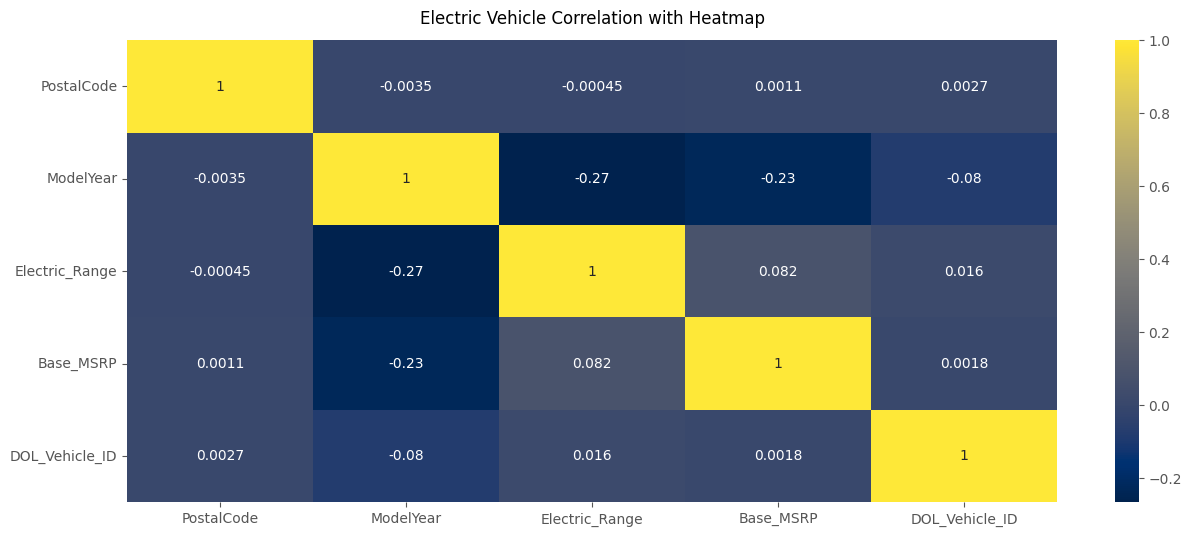

In [33]:
# checking the corrlation of all the attributes with target
plt.figure(figsize=(15, 6))
cmap = "cividis"
heatmap = sns.heatmap(numeric_df.corr(), cmap=cmap, annot=True)
heatmap.set_title('Electric Vehicle Correlation with Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

### 2.2 Distribution of numerical variables
ModelYear, Electric_Range, Base_MSRP, DOL_Vehicle_ID

Text(0, 0.5, 'Count')

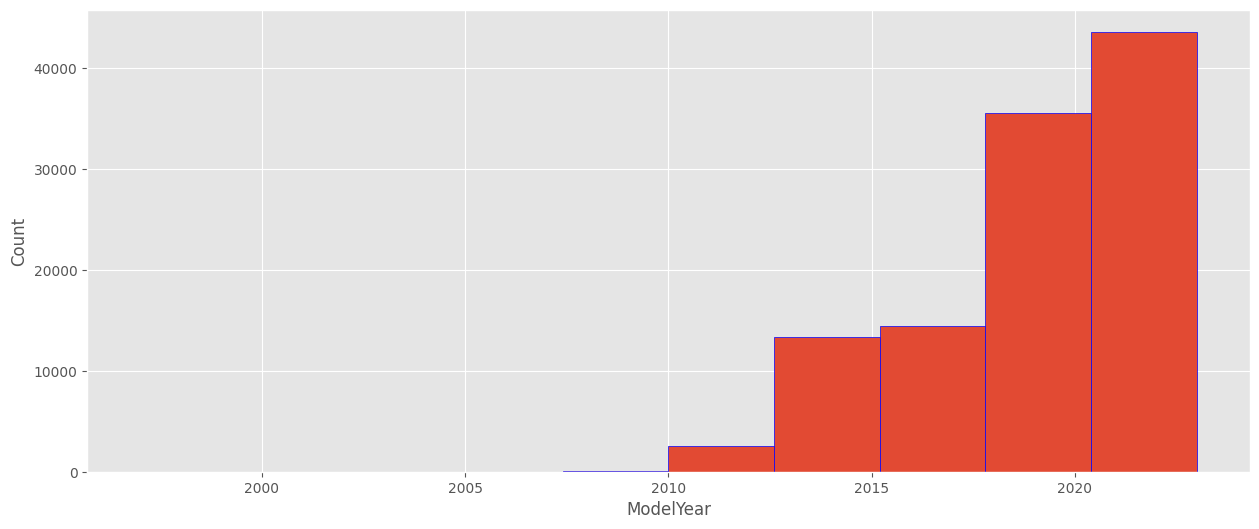

In [34]:
# Create a histogram of the PostalCode variable
plt.hist(df["ModelYear"], bins=10, edgecolor='blue')
plt.xlabel("ModelYear")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

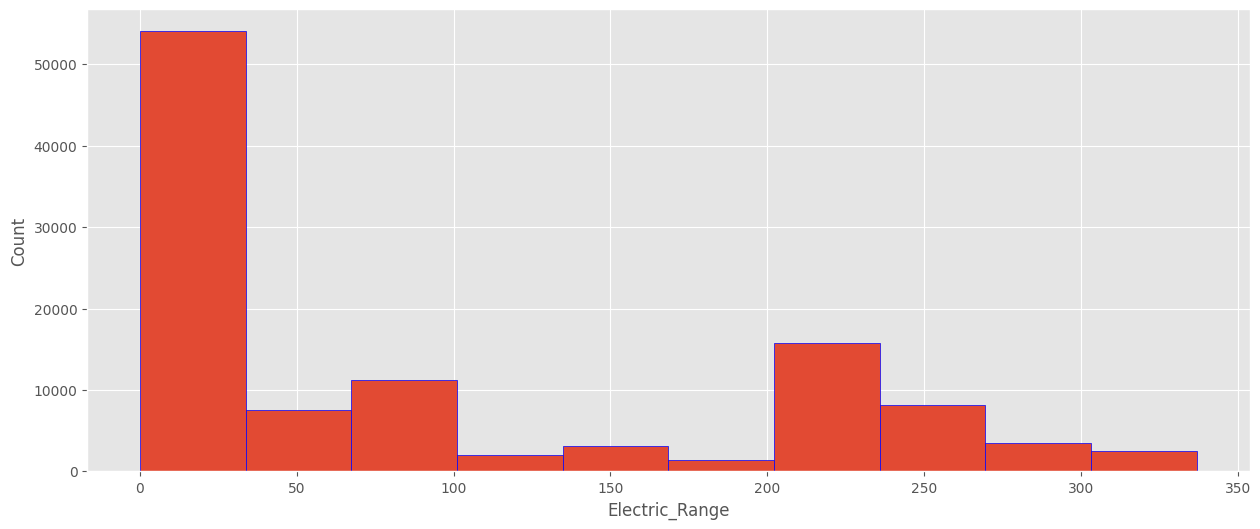

In [36]:
#Now  plot Histogram to check the normality and distribution of Model Year attribute
plt.hist(df["Electric_Range"],bins=10,edgecolor='blue')
plt.xlabel("Electric_Range")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

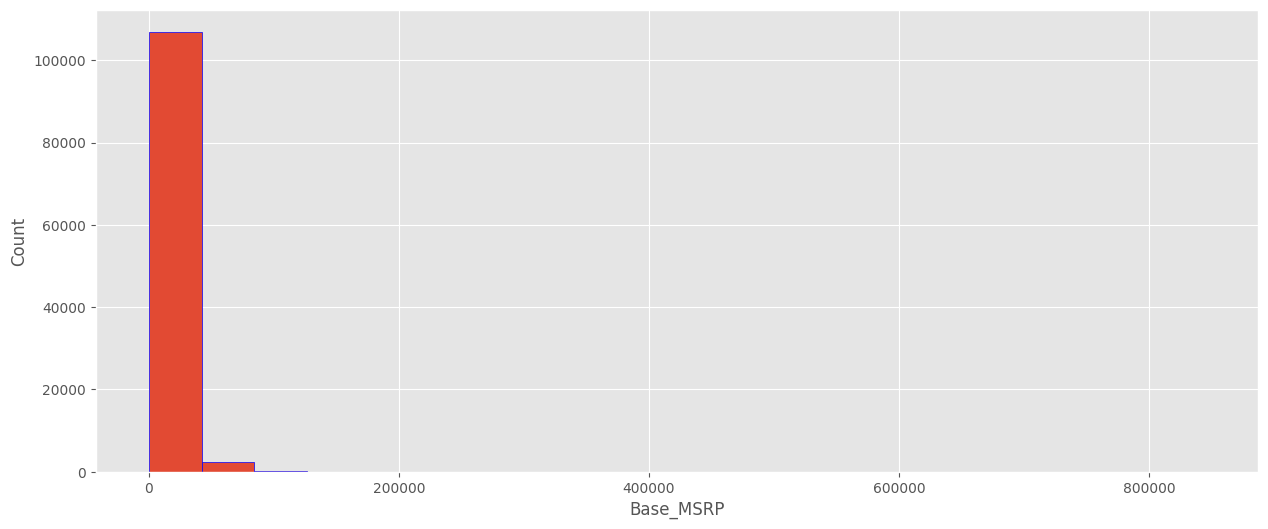

In [37]:
# Now plot the Histogram  to check the normality and distribution of Electric Range of the Cars in one charge
plt.hist(df["Base_MSRP"],bins=20,edgecolor='blue')
plt.xlabel("Base_MSRP")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

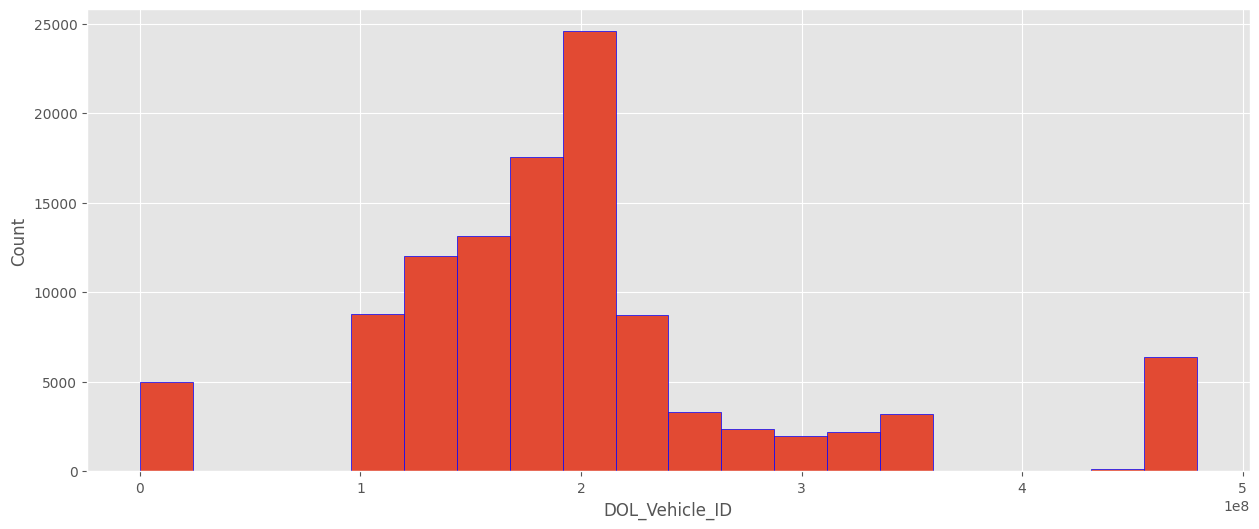

In [38]:
# Now plot the Histogram  to check the normality and distribution of Base MRP
plt.hist(df["DOL_Vehicle_ID"],bins=20, edgecolor='blue')
plt.xlabel("DOL_Vehicle_ID")
plt.ylabel("Count")

#### Observation 
From the histogram plots we can observe

* Although the Base MSRP column is very important, however the vendors have not provided this information. Therefore we will drop it
* The electric range colum of around 50K cars are not provided with legit information. Instead it is filled with zero

In [40]:
df['Base_MSRP'].unique()

array([     0,  31950,  69900,  34995,  59900,  32250,  33950,  39995,
        36900,  64950,  52900,  54950,  55700,  45600,  52650, 184400,
       110950,  44100,  75095,  36800,  43700, 102000,  98950,  90700,
        81100, 109000,  53400,  89100,  91250, 845000])

In [41]:
df.drop('Base_MSRP', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VIN                    109481 non-null  object
 1   County                 109481 non-null  object
 2   City                   109481 non-null  object
 3   State                  109481 non-null  object
 4   PostalCode             109481 non-null  int64 
 5   ModelYear              109481 non-null  int64 
 6   Make                   109481 non-null  object
 7   Model                  109481 non-null  object
 8   Electric_Vehicle_Type  109481 non-null  object
 9   CAFV_Eligibility       109481 non-null  object
 10  Electric_Range         109481 non-null  int64 
 11  Legislative_District   109481 non-null  object
 12  DOL_Vehicle_ID         109481 non-null  int64 
 13  Vehicle_Location       109481 non-null  object
 14  Electric_Utility       109481 non-null  object
 15  

#### Now deal with column Electric Utility
We Can present the information stored in the Electric Utility: |, || ,Utility Not Avalilable and just one utility optionn as: However, before any renaming. We will see the health of the attribute in terms of NULL values

* Not Available"
* Single Type Utilities"
* "Multi type Utilities"
* "Only One Option"

In [42]:
df['Electric_Utility'].unique()

array(['Utility Not Avalilable', 'PUD NO 1 OF CHELAN COUNTY',
       'PUGET SOUND ENERGY INC',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 'PACIFICORP',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'AVISTA CORP',
       'MODERN ELECTRIC WATER COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF PACIFIC COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA -

In [43]:
def categorize_electric_utility(value):
    if value == "Utility Not Avalilable":
        return "Not Available"
    elif "||" in value:
        return "Multi type Utilities"
    elif "|" in value:
        return "Single Type Utilities"
    else:
        return "Only One Option"

df['Electric_Utility_Category'] = df['Electric_Utility'].apply(categorize_electric_utility)

In [44]:
df['Electric_Utility_Category'].unique()

array(['Not Available', 'Only One Option', 'Single Type Utilities',
       'Multi type Utilities'], dtype=object)

In [45]:
df.head()

,VIN,County,City,State,PostalCode,ModelYear,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract,Electric_Utility_Category
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,Unknown,200589147,POINT (-104.89239 39.61914),Utility Not Avalilable,8005006861.0,Not Available
1,5YJXCBE27J,Island,Greenbank,WA,98253,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,10.0,326880081,POINT (-122.575569 48.08489),Utility Not Avalilable,53029971302.0,Not Available
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,Unknown,182237457,POINT (-119.78637 36.30101),Utility Not Avalilable,6031980000.0,Not Available
3,5YJ3E1EA8J,San Diego,Oceanside,CA,92051,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,Unknown,153998050,Unknown,Utility Not Avalilable,6073018509.0,Not Available
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,Unknown,320914072,POINT (-122.300531 37.869271),Utility Not Avalilable,6001423200.0,Not Available


In [46]:
#Now dealing with column Legislative District
#The specific section of Washington State that the vehicle's owner resides in, 
#as represented in the state legislature. We are going to drop his column as it is not important for our analysis
df['Legislative_District'].unique()

array(['Unknown', 10.0, 12.0, 32.0, 1.0, 2.0, 36.0, 34.0, 40.0, 21.0,
       44.0, 26.0, 39.0, 16.0, 23.0, 14.0, 38.0, 48.0, 13.0, 15.0, 9.0,
       46.0, 3.0, 37.0, 41.0, 11.0, 17.0, 19.0, 45.0, 18.0, 43.0, 5.0,
       24.0, 31.0, 33.0, 22.0, 49.0, 7.0, 35.0, 29.0, 20.0, 28.0, 25.0,
       27.0, 4.0, 8.0, 47.0, 30.0, 6.0, 42.0], dtype=object)

In [47]:
df.drop('Legislative_District', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   VIN                        109481 non-null  object
 1   County                     109481 non-null  object
 2   City                       109481 non-null  object
 3   State                      109481 non-null  object
 4   PostalCode                 109481 non-null  int64 
 5   ModelYear                  109481 non-null  int64 
 6   Make                       109481 non-null  object
 7   Model                      109481 non-null  object
 8   Electric_Vehicle_Type      109481 non-null  object
 9   CAFV_Eligibility           109481 non-null  object
 10  Electric_Range             109481 non-null  int64 
 11  DOL_Vehicle_ID             109481 non-null  int64 
 12  Vehicle_Location           109481 non-null  object
 13  Electric_Utility           109481 non-null  

### Some Important visualization

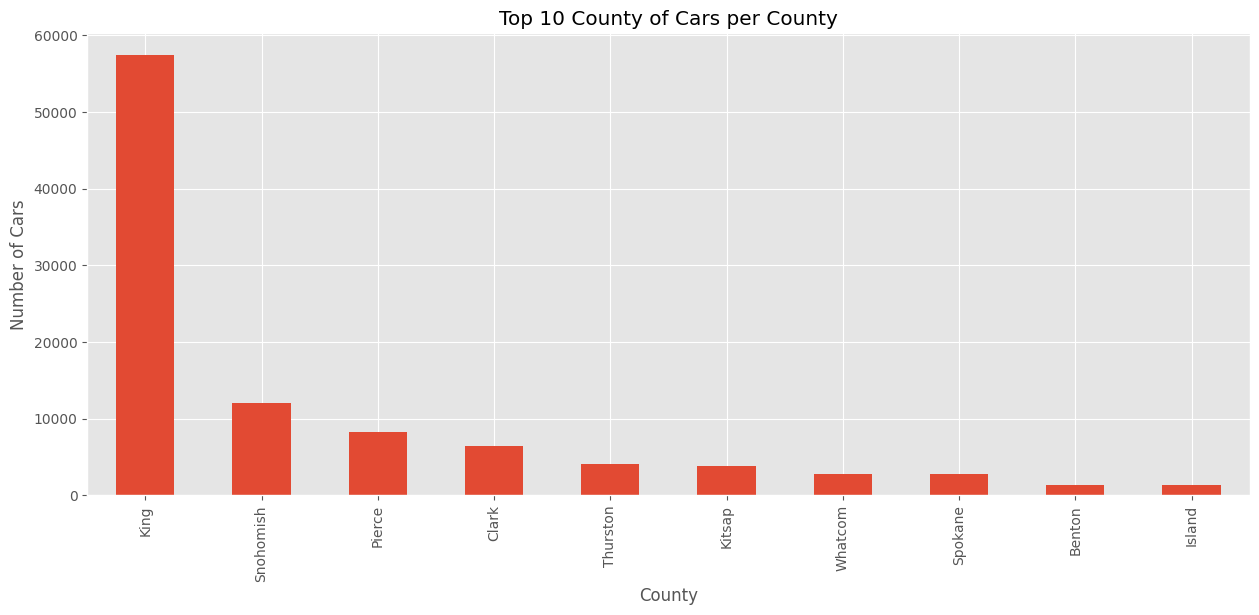

,count
County,
King,57398
Snohomish,12022
Pierce,8216
Clark,6460
Thurston,4035
Kitsap,3774
Whatcom,2767
Spokane,2719
Benton,1329


In [48]:
# First of all visualize Top 10 County of Cars per County
car_counts = df['County'].value_counts().nlargest(10)

# plot the counts
car_counts.plot(kind='bar')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.title('Top 10 County of Cars per County')
plt.show()

car_counts_df = car_counts.to_frame()
car_counts_df.style.background_gradient(cmap='Blues')

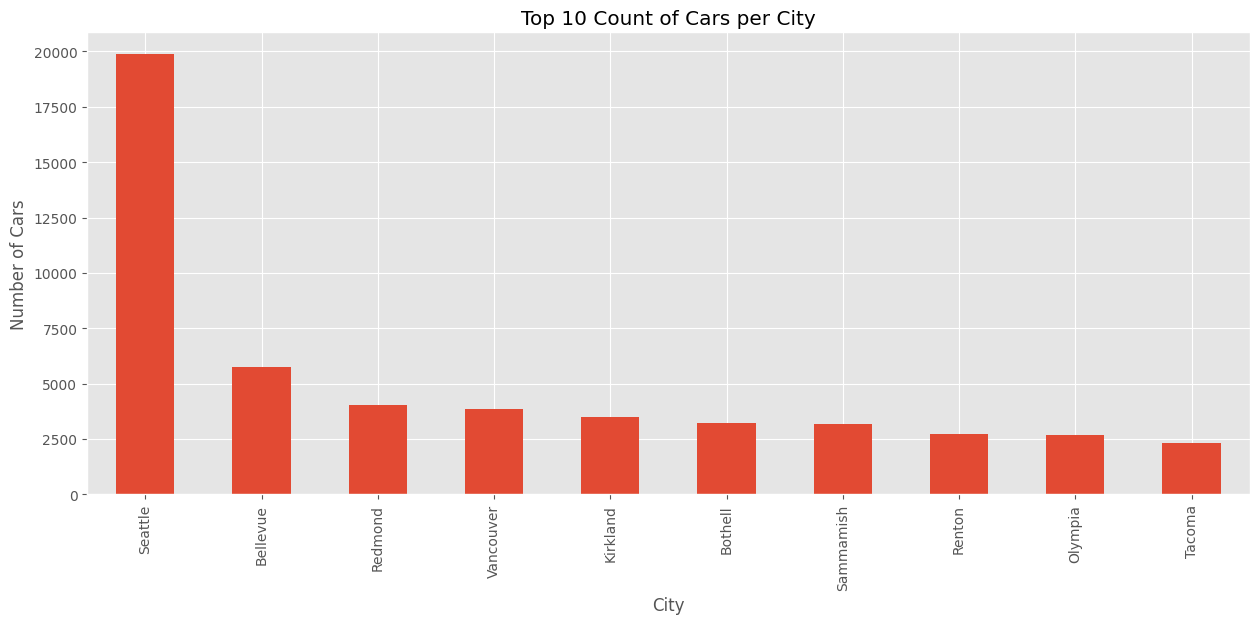

,count
City,
Seattle,19860
Bellevue,5751
Redmond,4044
Vancouver,3875
Kirkland,3486
Bothell,3210
Sammamish,3172
Renton,2725
Olympia,2677


In [49]:
# Now visualize the top 10 counts of Cars per city

car_counts_Cty = df['City'].value_counts().nlargest(10)
# plot the counts
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()

car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')

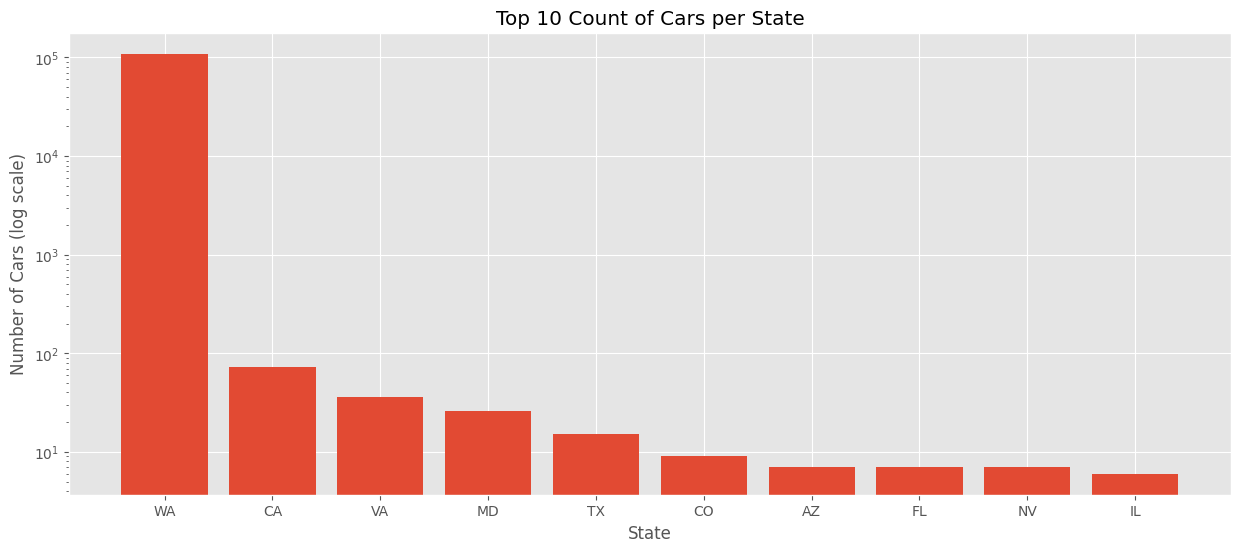

,count
State,
WA,109205
CA,72
VA,36
MD,26
TX,15
CO,9
AZ,7
FL,7
NV,7


In [50]:
#Top 10 Count of Cars per State'

car_counts_St = df['State'].value_counts().nlargest(10)
# plot the counts with a logarithmic y-axis
plt.bar(car_counts_St.index, car_counts_St.values)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars (log scale)')
plt.title('Top 10 Count of Cars per State')
plt.show()

car_counts_St_df = car_counts_St.to_frame()
car_counts_St_df.style.background_gradient(cmap='Blues')

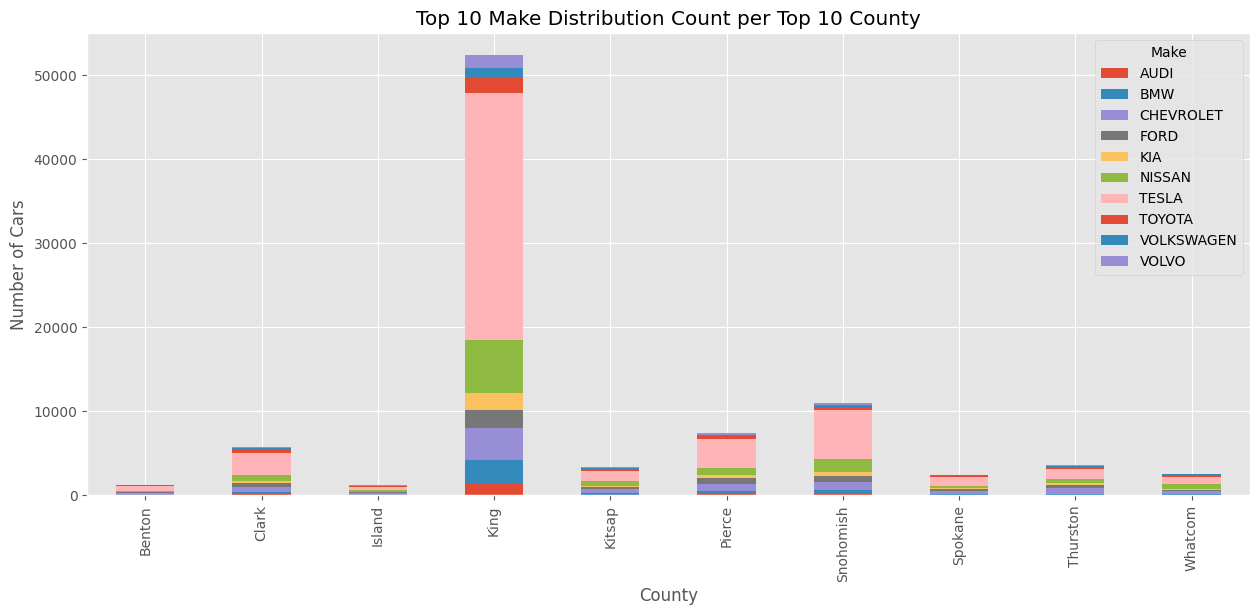

Make,AUDI,BMW,CHEVROLET,FORD,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
County,,,,,,,,,,
Benton,26,51,195,113,43,112,538,76,21,10
Clark,104,253,662,382,271,761,2591,439,121,109
Island,30,37,192,87,68,148,469,65,38,28
King,1402,2789,3848,2132,1990,6298,29407,1734,1276,1472
Kitsap,84,166,454,240,187,583,1222,173,97,118
Pierce,165,330,886,638,384,879,3403,346,155,175
Snohomish,161,412,998,697,480,1546,5835,381,262,227
Spokane,67,130,323,194,123,279,1064,111,57,35
Thurston,61,103,698,325,258,518,1207,228,87,58


In [51]:
# Top 10 Make distribution count per top 10 County
# Group data by 'County' and 'Make', counting occurrences of each combination
cnt_MkCounty = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Summarize counts for each combination of 'County' and 'Make'
grouped_data = cnt_MkCounty.groupby(['County', 'Make'])['Count'].sum().reset_index()

# Aggregate the total counts for each county
county_counts = grouped_data.groupby('County')['Count'].sum().reset_index()

# Aggregate the total counts for each make
make_counts = grouped_data.groupby('Make')['Count'].sum().reset_index()

# Identify the top 10 counties by count in descending order
top_counties = county_counts.sort_values(by='Count', ascending=False).head(10)

# Identify the top 10 makes by count in descending order
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the grouped data to include only rows where the county and make are in the top 10
filtered_data = grouped_data[
    grouped_data['County'].isin(top_counties['County']) & 
    grouped_data['Make'].isin(top_makes['Make'])
]

# Reshape the filtered data into a matrix: rows are counties, columns are makes, and values are counts
pivoted_data = filtered_data.pivot(index='County', columns='Make', values='Count').fillna(0)

# Plot a stacked bar chart to visualize the data
pivoted_data.plot(kind='bar', stacked=True)

# Add a title and axis labels to the plot
plt.title('Top 10 Make Distribution Count per Top 10 County')
plt.xlabel('County')
plt.ylabel('Number of Cars')

# Display the plot
plt.show()

# Display the top 10 rows of the pivoted data
pivoted_data.head(10)


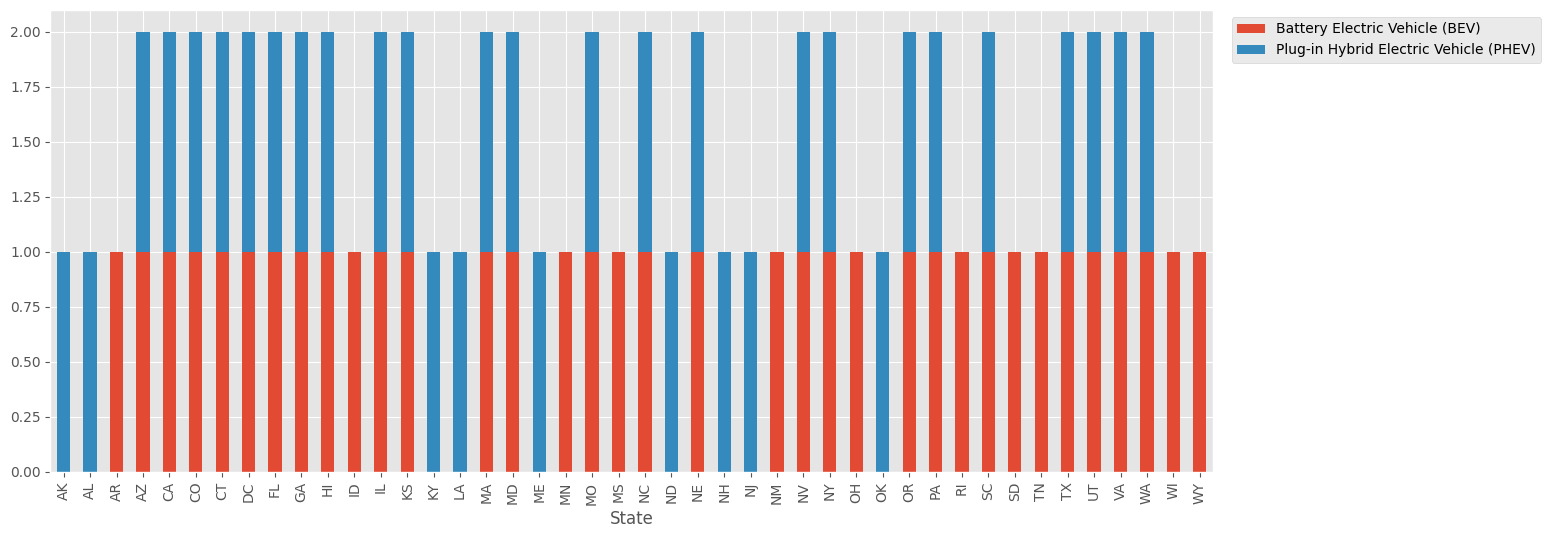

,State,Electric_Vehicle_Type,Count
5,CA,Battery Electric Vehicle (BEV),47
6,CA,Plug-in Hybrid Electric Vehicle (PHEV),25
7,CO,Battery Electric Vehicle (BEV),7
3,AZ,Battery Electric Vehicle (BEV),5
2,AR,Battery Electric Vehicle (BEV),3
4,AZ,Plug-in Hybrid Electric Vehicle (PHEV),2
8,CO,Plug-in Hybrid Electric Vehicle (PHEV),2
0,AK,Plug-in Hybrid Electric Vehicle (PHEV),1
1,AL,Plug-in Hybrid Electric Vehicle (PHEV),1
9,CT,Battery Electric Vehicle (BEV),1


In [52]:
# Now visualize  the EVT Distribution count per state
# EVT Distribution count per state
evt_Dis_cnt = df.groupby(['State', 'Electric_Vehicle_Type']).size().reset_index(name='Count')
evt_Dis_cnt.groupby(['State', 'Electric_Vehicle_Type'])['Count'].count().unstack().plot(kind='bar', stacked=True)

# Move legend outside of plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

evt_Dis_cnt.head(10).sort_values(by='Count', ascending=False)

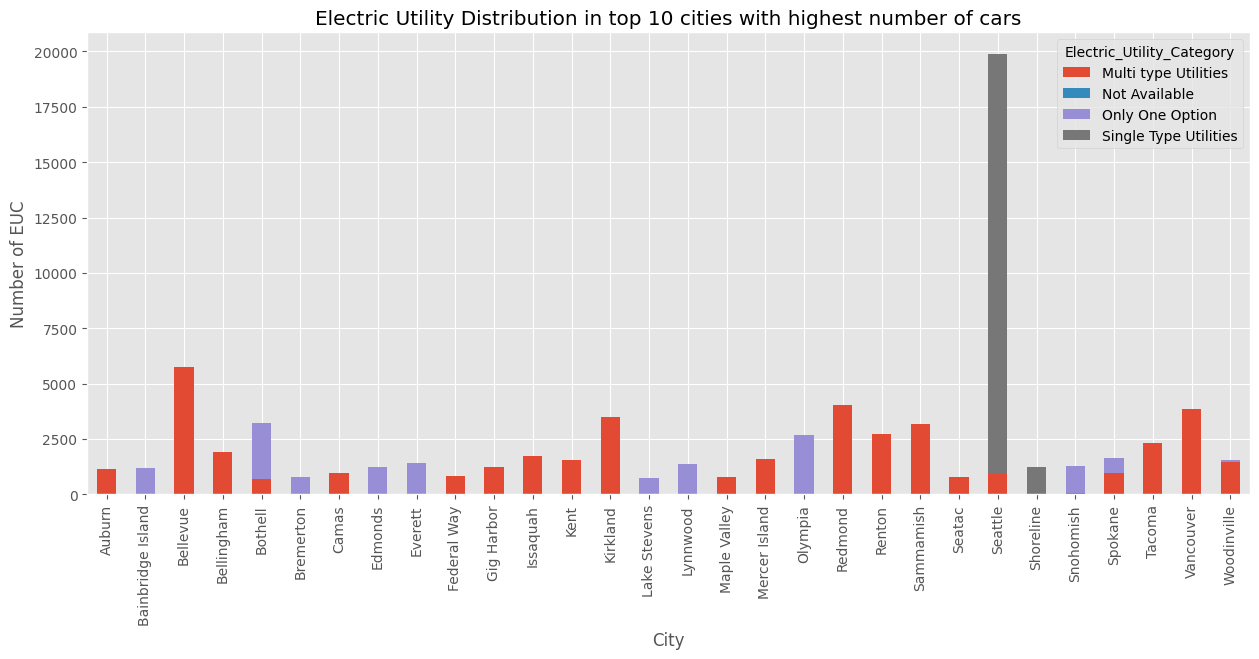

Electric_Utility_Category,Multi type Utilities,Not Available,Only One Option,Single Type Utilities
City,,,,
Auburn,1131.0,0.0,0.0,0.0
Bainbridge Island,0.0,12.0,1191.0,0.0
Bellevue,5750.0,1.0,0.0,0.0
Bellingham,1898.0,0.0,7.0,0.0
Bothell,710.0,0.0,2500.0,0.0
Bremerton,0.0,0.0,797.0,0.0
Camas,984.0,0.0,0.0,0.0
Edmonds,0.0,3.0,1257.0,0.0
Everett,2.0,0.0,1423.0,0.0


In [53]:
# Now visualize the  electric utility distribution in top 10 cities with highest number of cars.
cnt_Cty_EUD = df.groupby(['City', 'Electric_Utility_Category']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_Cty_EUD = cnt_Cty_EUD.groupby(['City', 'Electric_Utility_Category'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
Cty_EUD_counts = grouped_data_Cty_EUD.groupby('City')['Count'].sum().reset_index()
# make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_Cty_EUD_counts = Cty_EUD_counts.sort_values(by='Count', ascending=False).head(30)
# top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the data to only include the top 10 counties
filtered_data_Cty_EUD = grouped_data_Cty_EUD[grouped_data_Cty_EUD['City'].isin(top_Cty_EUD_counts['City'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_Cty_EUD = filtered_data_Cty_EUD.pivot(index='City', columns='Electric_Utility_Category', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_Cty_EUD.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Electric Utility Distribution in top 10 cities with highest number of cars')
# plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of EUC')

# Show the plot
plt.show()

pivoted_data_Cty_EUD.head(10)

In [54]:
# Now visualize the Distances Travel by vehicle make per electric charge
import plotly.express as ps
km_range = pd.DataFrame(df.groupby('Make')['Electric_Range'].mean().reset_index()).sort_values(by='Electric_Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
ps.pie(data_frame=km_range, names='model', values='km_range', hover_name='km_range',title='Top 10 Model with KM range',hole=True)

In [55]:
# Now visualize  the Year Wise Cars sales growth
# Year Wise Cars
year_wise_cars = df.groupby('ModelYear')['VIN'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']

fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

## 4. Summary & Conclusion
The Electric Vehicle Population dataset contains information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through Washington State Department of Licensing (DOL). Through exploratory data analysis, the top 10 counts of cars per county, city, state, and postal code were determined. King County had the most cars registered, followed by Snohomish and Pierce counties. Seattle had the most cars registered by city, followed by Bellevue and Redmond. Washington had the most cars registered by state, followed by California and Virginia.

The dataset also provided insight into the top 10 consumed car makers by county, city, and state, with Tesla being the most popular make overall. There appears to be an opportunity for car vendors like Audi and BMW to market their vehicles in other states. The top 10 postal codes were also identified, providing further insight for marketing and upselling opportunities.